In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state (Geographic Area)

In [4]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [6]:
pr["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [44]:
pr["City"].nunique()

24255

In [45]:
pr["Geographic Area"].nunique()

51

In [8]:
pr["City"].nunique()

24255

In [14]:
pr.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
77         1
58.5       1
78.3       1
73         1
84.8       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [4]:
pr.poverty_rate.replace('-', 0, inplace=True)

In [5]:
pr.poverty_rate.value_counts()

0       1464
0        201
6.7      129
7.4      129
10.9     128
        ... 
81.2       1
56.5       1
62.3       1
50.6       1
65         1
Name: poverty_rate, Length: 771, dtype: int64

In [16]:
pr.poverty_rate.value_counts()

0       1464
0        201
6.7      129
7.4      129
10.9     128
        ... 
88         1
98.6       1
89.6       1
88.4       1
84.8       1
Name: poverty_rate, Length: 771, dtype: int64

In [13]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [6]:
pr.poverty_rate = pr.poverty_rate.astype('float')

In [7]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [18]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [19]:
pr.poverty_rate.value_counts()

0.0     1665
6.7      129
7.4      129
10.9     128
10.0     128
        ... 
71.1       1
83.6       1
69.2       1
88.0       1
92.0       1
Name: poverty_rate, Length: 770, dtype: int64

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [21]:
pr.groupby("Geographic Area").poverty_rate.mean().head()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

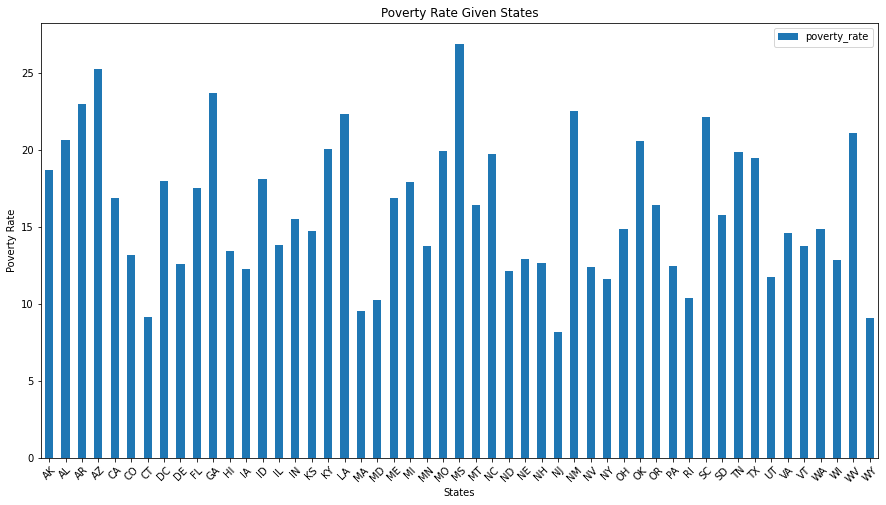

In [10]:
ax = pr.groupby("Geographic Area").poverty_rate.mean().plot.bar(rot=45, figsize=(15, 8))
ax.set_ylabel('Poverty Rate')
ax.set_xlabel('States')
ax.set_title('Poverty Rate Given States')
ax.legend();

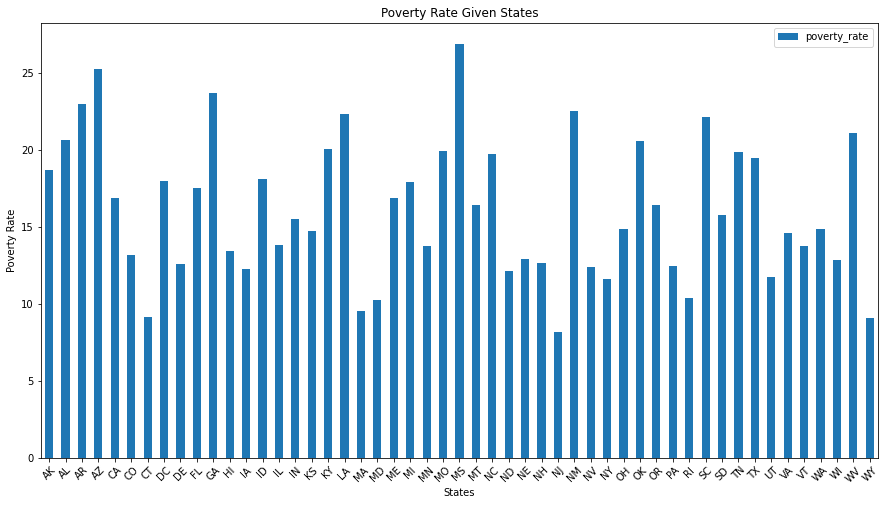

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

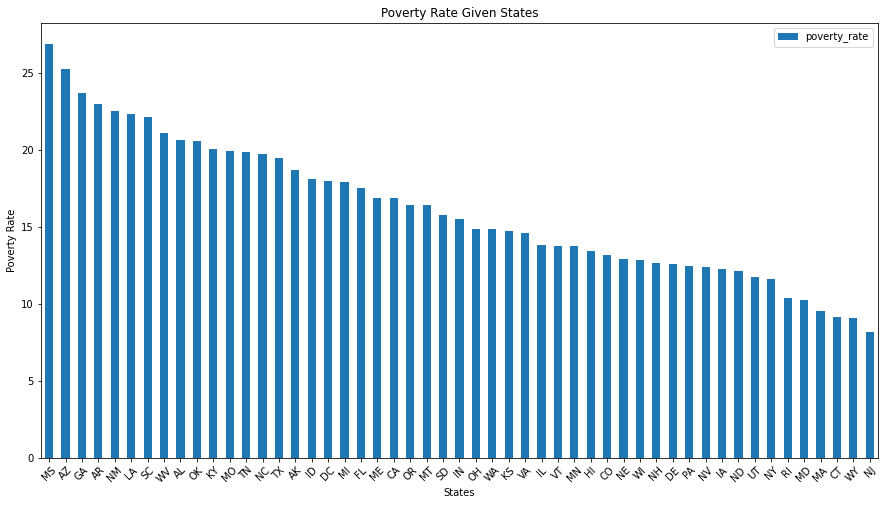

In [13]:
ax = pr.groupby("Geographic Area")['poverty_rate'].mean().sort_values(ascending=False).plot.bar(rot=45, figsize=(15, 8))
ax.set_ylabel('Poverty Rate')
ax.set_xlabel('States')
ax.set_title('Poverty Rate Given States')
ax.legend();

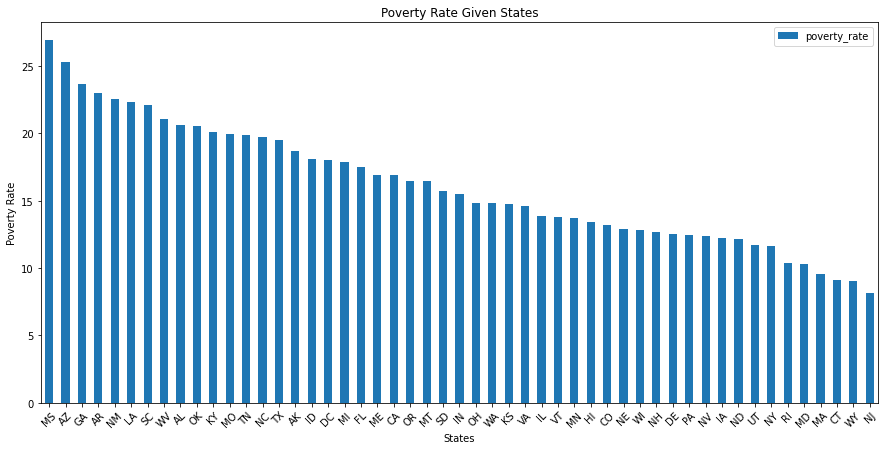

In [38]:
.........

**INSTRUCTION-3.b : Plot Sorted Values With Seaborn and set a green horizontal line on 20** 

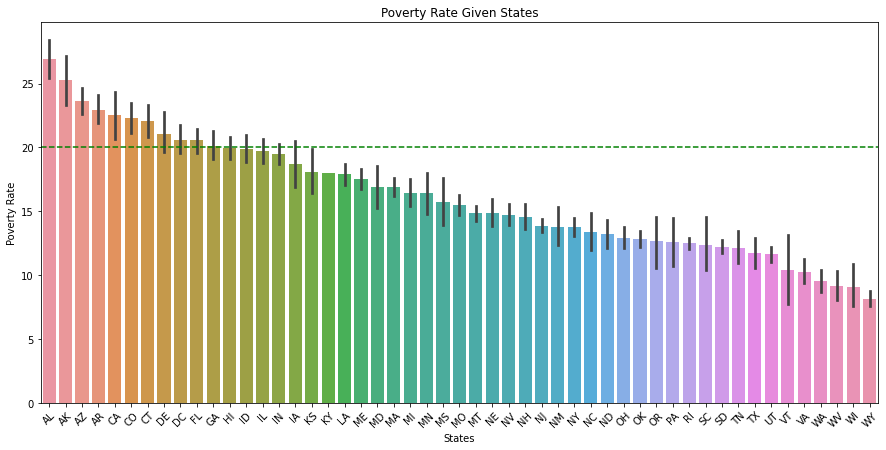

In [19]:
fig,ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(y='poverty_rate', x='Geographic Area', data=pr, order=pr.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending=False).index)
ax.set_xticks(range(len(pr["Geographic Area"].unique())))
ax.set_xticklabels(pr["Geographic Area"].unique(), rotation=45)
ax.axhline(y=20, color='green', ls='--')
ax.set_xlabel('States')
ax.set_ylabel('Poverty Rate')
ax.set_title('Poverty Rate Given States');

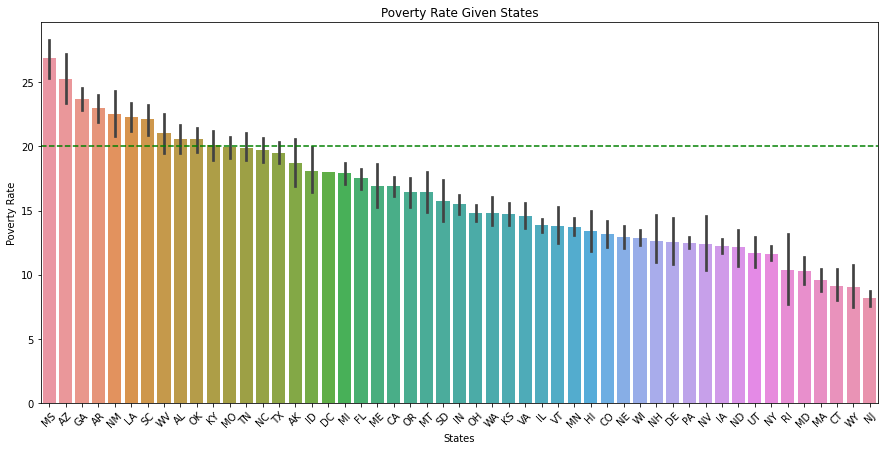

In [68]:
................

## 2. Most common 15 Name or Surname of killed people 

In [21]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [22]:
kill.shape

(2535, 14)

In [23]:
kill.name.value_counts()

TK TK                       49
Eric Harris                  2
Michael Brown                2
Michael Johnson              2
Daquan Antonio Westbrook     2
                            ..
Michael Tindall              1
Jeffrey Clyde Wilkes         1
Scottie Yanagawa             1
Kelley Brandon Forte         1
Asshams Pharoah Manley       1
Name: name, Length: 2481, dtype: int64

In [24]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [25]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

In [26]:
pairs.shape

(2486,)

In [27]:
pairs[0]

['Tim', 'Elliot']

In [28]:
pairs[0][0]

'Tim'

In [29]:
table = []
for i in pairs:
    for j in i:
        table.append(j)

In [30]:
len(table)

5904

In [44]:
most_common_names = Counter(table)

In [45]:
most_common_names = most_common_names.most_common(15)
most_common_names

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [51]:
df = pd.DataFrame(list(most_common_names), columns=["name_or_surname_most_frequency", "frequency"])
df

,name_or_surname_most_frequency,frequency
0,Michael,91
1,James,57
2,David,57
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,38


In [46]:
labels=df.name_or_surname_most_frequency
x = np.arange(len(labels))

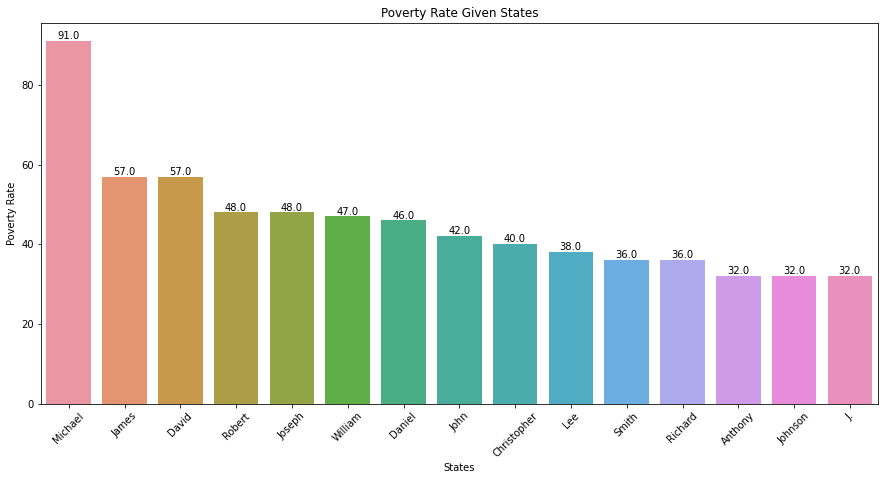

In [53]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(x='name_or_surname_most_frequency', y='frequency', data=df)
ax.set_xticks(range(len(df["name_or_surname_most_frequency"].unique())))
ax.set_xticklabels(df["name_or_surname_most_frequency"].unique(), rotation=45)
ax.set_xlabel('States')
ax.set_ylabel('Poverty Rate')
ax.set_title('Poverty Rate Given States')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

In [124]:
most_common_names

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

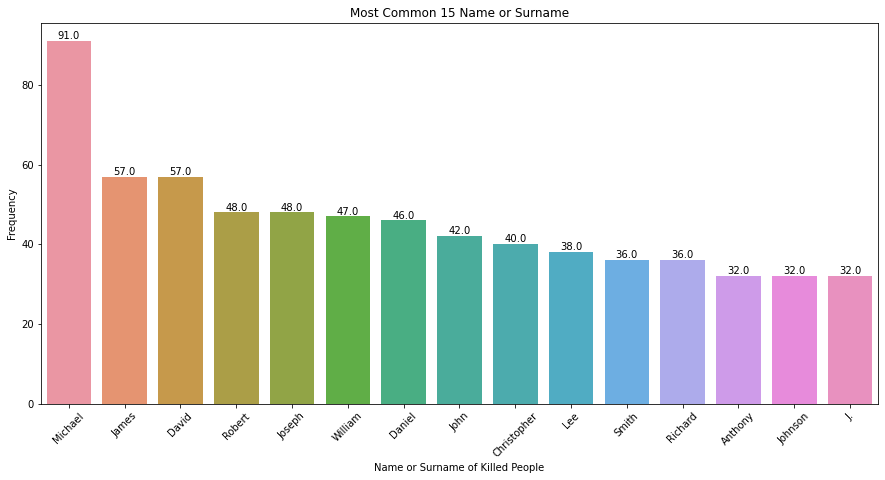

In [137]:
..................

## 3. Killed People According to Races (Pie Chart)

In [54]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [55]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [56]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [63]:
kill.dropna(inplace=True)

In [64]:
labels = kill.race.unique()
sizes = kill.race.value_counts()

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

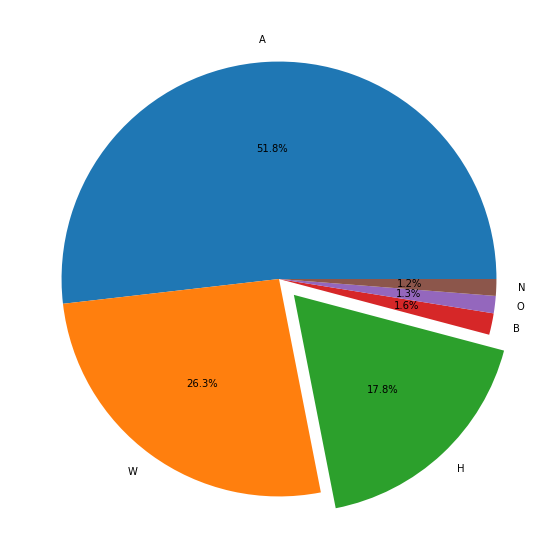

In [65]:
labels = labels
sizes = sizes
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0);

In [145]:
............

In [146]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [151]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [67]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [153]:
sizes=kill.race.value_counts().values

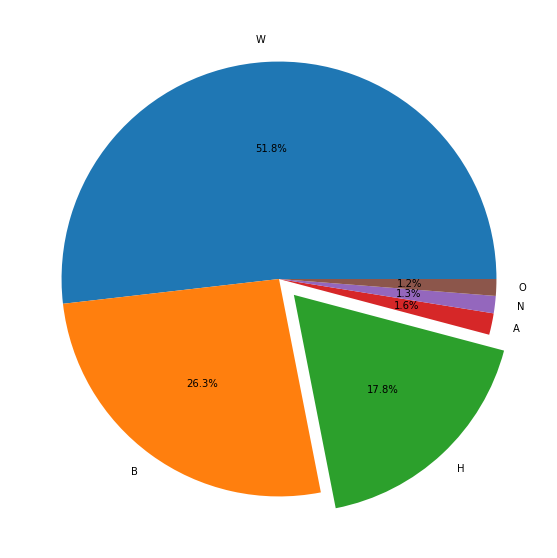

In [154]:
................

## 4a.Box plot of age in both genders separeted by manner of death.

In [155]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [68]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

In [156]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

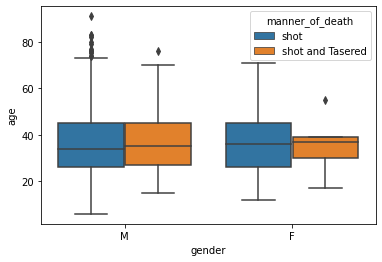

In [70]:
sns.boxplot(y='age', x='gender', data=kill, hue='manner_of_death');

<AxesSubplot:xlabel='gender', ylabel='age'>

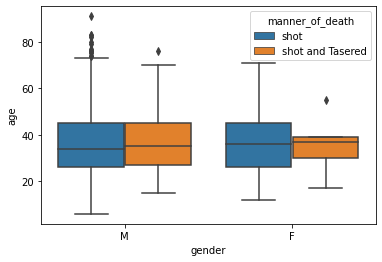

In [157]:
................

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

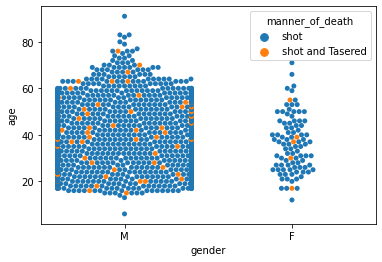

<Figure size 1080x504 with 0 Axes>

In [72]:
sns.swarmplot(y='age', x='gender', data=kill, hue='manner_of_death');

<AxesSubplot:xlabel='gender', ylabel='age'>

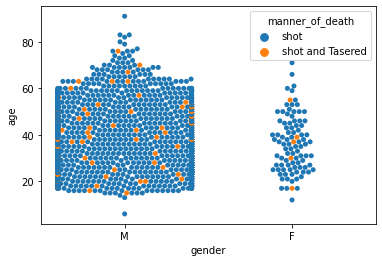

In [160]:
.............

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

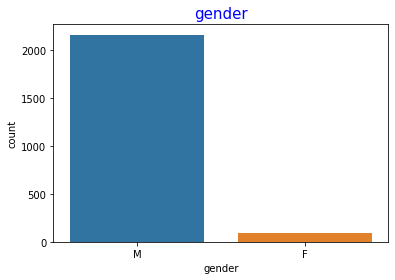

In [75]:
fig, ax = plt.subplots()
sns.countplot(x = 'gender', data=kill)
ax.set_title('gender', color='b', fontsize=15);

Text(0.5, 1.0, 'gender')

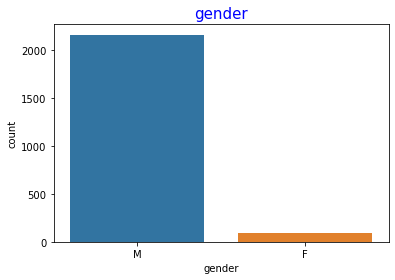

In [161]:
..........

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [163]:
kill.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'metal rake', 'baton', 'crowbar',
       'oar', 'machete and gun', 'air conditioner', 'pole and knife',
       'beer bottle', 'pipe', 'baseba

In [84]:
kill.armed.value_counts()[:7]

gun             1247
knife            324
unarmed          165
vehicle          158
toy weapon       102
undetermined      92
machete           16
Name: armed, dtype: int64

''

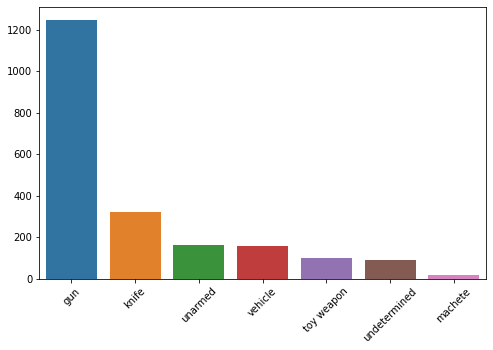

In [91]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x = kill.armed.value_counts()[:7].index, y=kill.armed.value_counts()[:7].values, data=kill)
ax.set_xticks(range(len(kill.armed.value_counts()[:7].index)))
ax.set_xticklabels(kill.armed.value_counts()[:7].index, rotation=45)
;

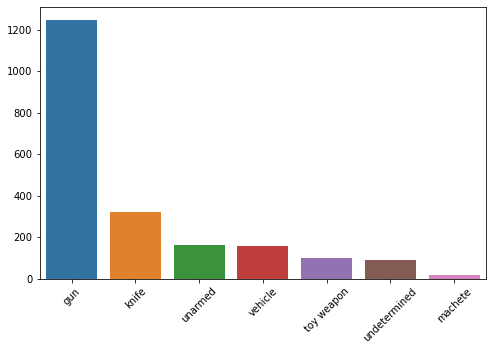

In [167]:
..........

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [92]:
kill['age_cat'] = kill.age.apply(lambda x : "above25" if x > 25 else "below25")

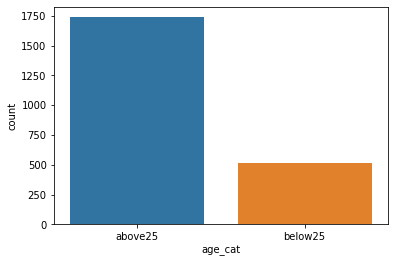

In [93]:
sns.countplot(x='age_cat', data=kill);

<AxesSubplot:xlabel='age_cat', ylabel='count'>

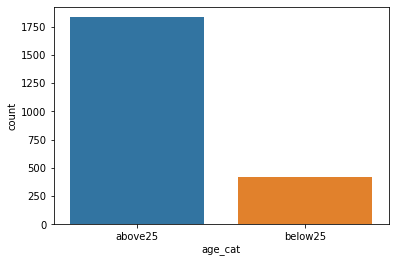

In [171]:
...........

**INSTRUCTION-4: Plot number of killed poeple by race**

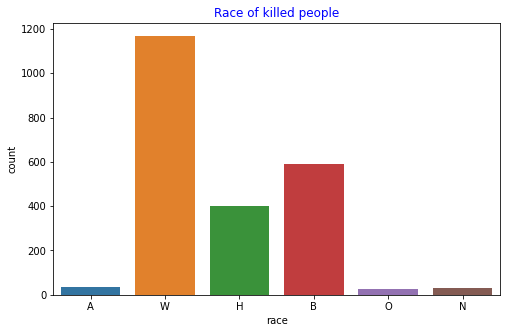

In [96]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='race', data=kill)
ax.set_title("Race of killed people", color='blue');

Text(0.5, 1.0, 'Race of killed people')

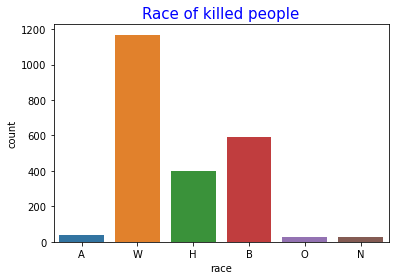

In [172]:
...........

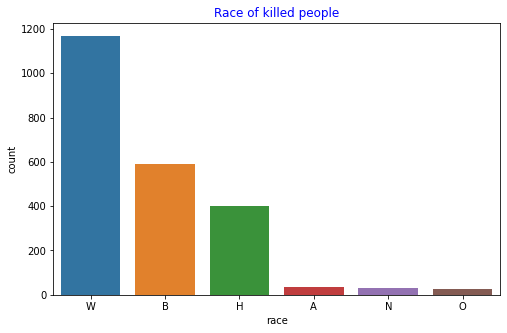

In [100]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='race', data=kill, order=kill.groupby('race').race.count().sort_values(ascending=False).index)
ax.set_title("Race of killed people", color='blue');

<AxesSubplot:xlabel='race', ylabel='count'>

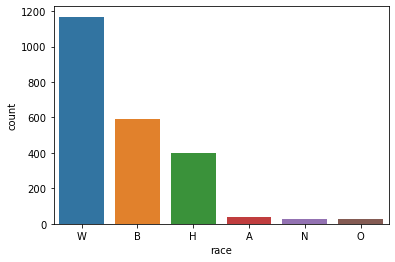

In [173]:
............

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [101]:
ee=kill.city.value_counts()[:12].index
ff=kill.city.value_counts()[:12].values
labels=list(ee.values)
ticks=np.arange(len(labels))

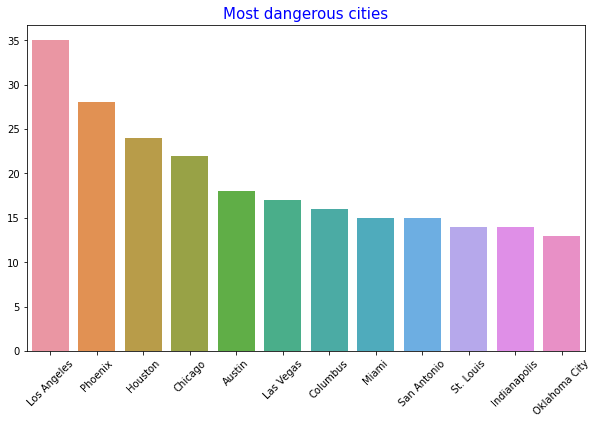

In [102]:
fig, ax =plt.subplots(figsize=(10,6))
sns.barplot(ee,ff)
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

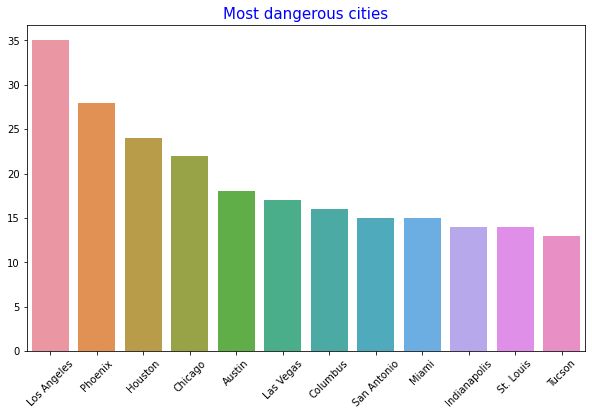

In [176]:
.............

**INSTRUCTION-6: Plot 20 most dangerous states**

In [103]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [146]:
most_dag_states = pr.groupby('Geographic Area').count().sort_values(by='poverty_rate', ascending=False)[:20]
most_dag_states = most_dag_states.reset_index('Geographic Area')

In [147]:
most_dag_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  20 non-null     object
 1   City             20 non-null     int64 
 2   poverty_rate     20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


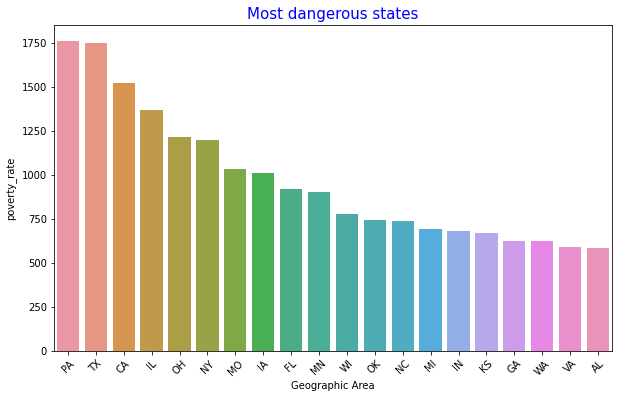

In [150]:
fig, ax =plt.subplots(figsize=(10,6))
sns.barplot(x='Geographic Area', y='poverty_rate', data=most_dag_states)
ax.set_xticks(range(len(most_dag_states['Geographic Area'])))
ax.set_xticklabels(most_dag_states['Geographic Area'], rotation = 45)
ax.set_title('Most dangerous states',color = 'blue',fontsize=15);

In [151]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
 14  age_cat                 

In [155]:
kill.threat_level

0             attack
1             attack
2              other
3             attack
4             attack
            ...     
2519    undetermined
2523          attack
2525          attack
2533          attack
2534          attack
Name: threat_level, Length: 2254, dtype: object

In [157]:
most_dag_states = kill.groupby('state')['state'].count().sort_values(ascending=False)[:20]
most_dag_states

state
CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
PA     45
AL     45
VA     43
NY     43
WI     42
SC     41
Name: state, dtype: int64

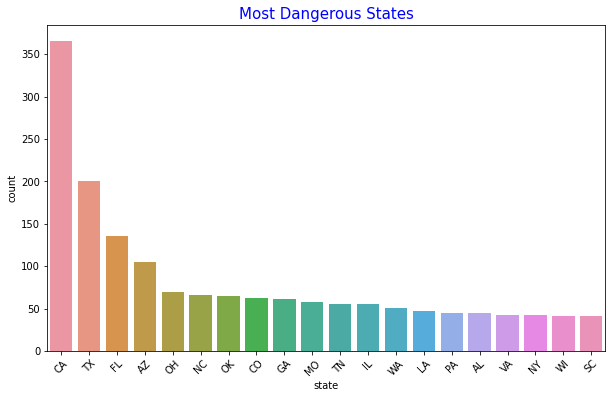

In [171]:
fig, ax =plt.subplots(figsize=(10,6))
sns.countplot(x='state', data=kill, order=kill.groupby('state')['state'].count().sort_values(ascending=False)[:20].index)
ax.set_xticklabels(kill.groupby('state')['state'].count().sort_values(ascending=False)[:20].index, rotation=45)
ax.set_title('Most Dangerous States', color='blue', fontsize=15);


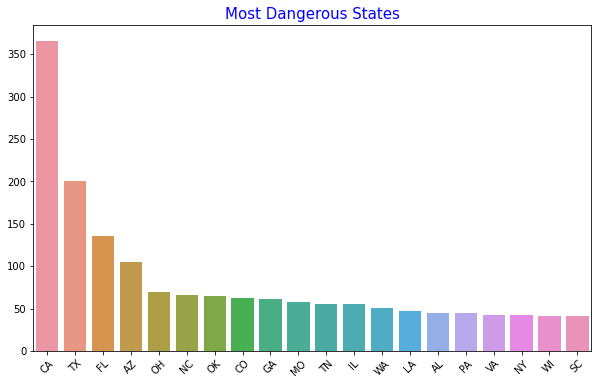

In [184]:
...........

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

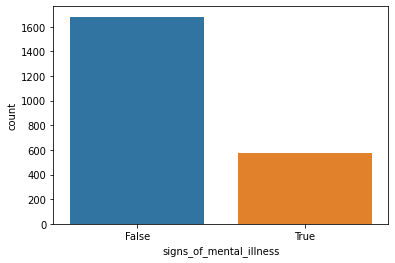

In [172]:
sns.countplot(kill.signs_of_mental_illness)

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

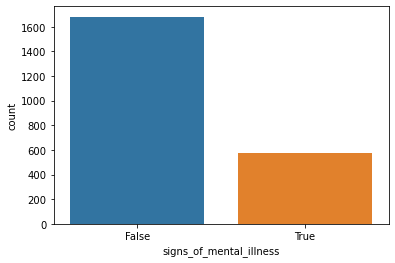

In [186]:
.............

**INSTRUCTION-8: Plot number of Threat Types**

<AxesSubplot:xlabel='threat_level', ylabel='count'>

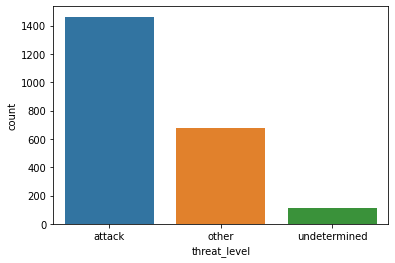

In [173]:
sns.countplot(kill.threat_level)

<AxesSubplot:xlabel='threat_level', ylabel='count'>

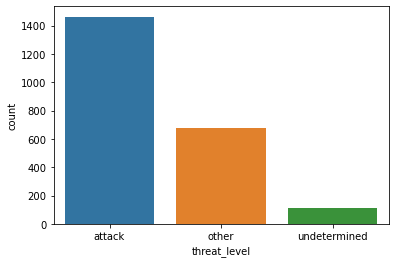

In [187]:
..........

**INSTRUCTION-9: Plot number of Flee Types**

<AxesSubplot:xlabel='flee', ylabel='count'>

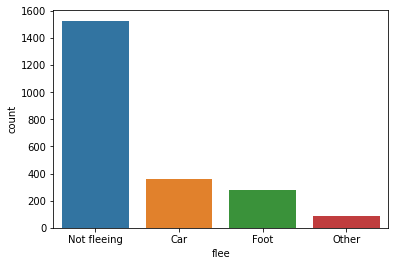

In [174]:
sns.countplot(kill.flee)

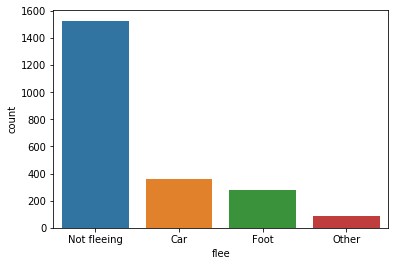

In [51]:
..........